In [2]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset("topo.nc")
ds

<xarray.Dataset>
Dimensions:     (x: 17569, y: 17002)
Coordinates:
  * y           (y) float32 4230327.0 4230324.0 ... 4179327.0 4179324.0
  * x           (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Data variables:
    veg_height  (y, x) float32 ...
    veg_tau     (y, x) float32 ...
    veg_k       (y, x) float32 ...
    veg_type    (y, x) uint32 ...
    dem         (y, x) float32 ...
    mask        (y, x) uint8 ...
    projection  |S1 ...
Attributes:
    last_modified:       [2019-08-08 17:17:16] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-08-08 17:17:34
    Title:               Topographic Images for SMRF/AWSM
    history:             [2019-08-08 17:17:34] Create netCDF4 file using Basi...
    institution:         USDA Agricultural Research Service, Northwest Waters...
    generation_command:  /usr/local/bin/basin_setup -f corrected_tuolumne_sub...

In [4]:
dem = ds.dem
dem.values

array([[2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 ,
        2137.6157],
       [2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 ,
        2137.6157],
       [2634.1025, 2637.2336, 2637.2336, ..., 2139.121 , 2139.121 ,
        2138.9734],
       ...,
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907,
        3062.4495],
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907,
        3062.4495],
       [1587.6707, 1582.0449, 1582.0449, ..., 3064.8484, 3064.8484,
        3064.3577]], dtype=float32)

In [5]:
dem.shape

(17002, 17569)

In [6]:
dem.dims

('y', 'x')

In [7]:
dem.coords

Coordinates:
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0

In [8]:
dem.attrs

OrderedDict([('long_name', 'dem'), ('grid_mapping', 'projection')])

In [9]:
ds.attrs

OrderedDict([('last_modified', '[2019-08-08 17:17:16] Data added or updated'),
             ('Conventions', 'CF-1.6'),
             ('dateCreated', '2019-08-08 17:17:34'),
             ('Title', 'Topographic Images for SMRF/AWSM'),
             ('history',
              '[2019-08-08 17:17:34] Create netCDF4 file using Basin Setup v0.8.2'),
             ('institution',
              'USDA Agricultural Research Service, Northwest Watershed Research Center'),
             ('generation_command',
              '/usr/local/bin/basin_setup -f corrected_tuolumne_subbasin.shp -bn Tuolumne -dm tuolumne_UTM11_WGS84.tif -apd 0 0 0 220 -d /Downloads --cell_size 3')])

In [10]:
dem

<xarray.DataArray 'dem' (y: 17002, x: 17569)>
array([[2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 , 2137.6157],
       [2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 , 2137.6157],
       [2634.1025, 2637.2336, 2637.2336, ..., 2139.121 , 2139.121 , 2138.9734],
       ...,
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907, 3062.4495],
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907, 3062.4495],
       [1587.6707, 1582.0449, 1582.0449, ..., 3064.8484, 3064.8484, 3064.3577]],
      dtype=float32)
Coordinates:
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Attributes:
    long_name:     dem
    grid_mapping:  projection

In [11]:
ds.mask

<xarray.DataArray 'mask' (y: 17002, x: 17569)>
[298708138 values with dtype=uint8]
Coordinates:
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Attributes:
    long_name:     Tuolumne
    grid_mapping:  projection

In [12]:
dem = ds.dem
dem

<xarray.DataArray 'dem' (y: 17002, x: 17569)>
array([[2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 , 2137.6157],
       [2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 , 2137.6157],
       [2634.1025, 2637.2336, 2637.2336, ..., 2139.121 , 2139.121 , 2138.9734],
       ...,
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907, 3062.4495],
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907, 3062.4495],
       [1587.6707, 1582.0449, 1582.0449, ..., 3064.8484, 3064.8484, 3064.3577]],
      dtype=float32)
Coordinates:
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Attributes:
    long_name:     dem
    grid_mapping:  projection

In [13]:
dem[:16000, :16000]

<xarray.DataArray 'dem' (y: 16000, x: 16000)>
array([[2633.369 , 2635.3313, 2635.3313, ..., 1999.8629, 1999.9436, 1999.9436],
       [2633.369 , 2635.3313, 2635.3313, ..., 1999.8629, 1999.9436, 1999.9436],
       [2634.1025, 2637.2336, 2637.2336, ..., 1999.98  , 2000.0349, 2000.0349],
       ...,
       [1919.2953, 1919.6599, 1919.6599, ..., 3337.7664, 3340.4688, 3340.4688],
       [1919.2953, 1919.6599, 1919.6599, ..., 3337.7664, 3340.4688, 3340.4688],
       [1918.0524, 1918.3596, 1918.3596, ..., 3338.0222, 3340.798 , 3340.798 ]],
      dtype=float32)
Coordinates:
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4182333.0 4182330.0
  * x        (x) float32 254007.0 254010.0 254013.0 ... 302001.0 302004.0
Attributes:
    long_name:     dem
    grid_mapping:  projection

In [14]:
dem.dtype

dtype('float32')

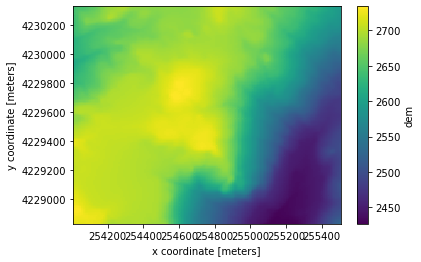

In [15]:
dem.isel(x=slice(0, 500), y=slice(0,500)).plot()

In [16]:
# multiple file open snowdepth
# combine with DEM??
# use snowdepth time series to interpolate years 2015 and 2017
# generate and plot contour map of DEM
# plot 2015 and 2017 data in separate subplots (and/or subtract to find anomaly difference), overlaying contour map 

<a list of 35 text.Text objects>

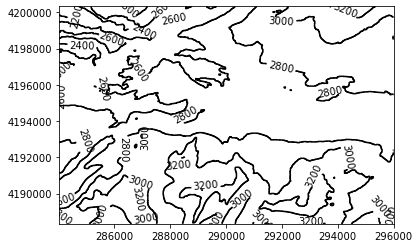

In [18]:
fig, ax = plt.subplots()
contours = ax.contour(dem.x.isel(x=slice(10000,14000)), dem.y.isel(y=slice(10000,14000)), dem.isel(x=slice(10000,14000), y=slice(10000,14000)), colors='k')
ax.clabel(contours, fmt='%1.0f')

AttributeError: 'QuadMesh' object has no property 'transparent'

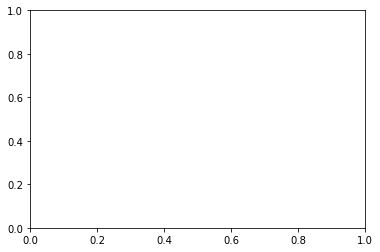

In [31]:
# superimposing two data layers
fig, ax = plt.subplots()
dem.isel(x=slice(0, 500), y=slice(0,500)).plot(transparent=True)
contours = ax.contour(dem.x.isel(x=slice(10000,14000)), dem.y.isel(y=slice(10000,14000)), dem.isel(x=slice(10000,14000), y=slice(10000,14000)), colors='k')
ax.clabel(contours, fmt='%1.0f')
